# Explore Zika research through text data mining

## What is this, where am I?

This is the Jupyter notebook, the second part of the Zika virus tutorial, which focuses on the analysis. We will explore the extracted facts from part one and apply text and data mining techniques on it to get a better understanding of the Zika virus. 

You can find the first part, where the used data gets downloaded and the facts extracted [here](https://github.com/ContentMine/FutureTDM/tree/master/tutorial/zika). You need to execute it before to get the data necessary for this part of the tutorial.

You find all necessary informations on our central [Virginia Tech Open Data Week GitHub repository](https://github.com/ContentMine/vt-open-data-week).

A Jupyter notebook consists of cells like this, which contain documentary text, images, or executable code. You can proceed through each cell by selecting it and pressing `Ctrl + Enter` or by clicking on the `Play` button in the menu bar. You don't need to know how to program in order to use this notebook. If you already know some python, please feel free to modify, change and experiment with the code and data. If not, just have a look and engage where you want.

This work is part of Future TDM - The Future of Text and Data Mining, an EU Horizon2020 research project with participation of Open Knowledge International and ContentMine.

## What are we going to do?

We will explore the scientific publications downloaded as explained in the [Zika virus tutorial](https://github.com/ContentMine/FutureTDM/tutorials/zika). 

There are several methods applied. Some of them are descriptive and show the wanted outcome, but some are explorativ and conclusions must be done by a domain expert by exploring the data and it's presentation by her/himselves. Following analysis is done:
- plot a timeline of the publication years
- get the most mentioned words and species over the full corpus
- find relations between terms (species, words, authors, journals, publications) through network analysis methods, like community detection, co-occurences and network-projection.
- find all publications in which a term was mentioned

## Set up your environment
Import the prepared python functions into the notebook. If you want to know more about pyCProject, the ContentMine Python wrapper for the [CProject](https://github.com/ContentMine/workshop-resources/blob/master/software-tutorials/cproject/README.md), have a look at the [GitHub repository](https://github.com/ContentMine/pyCProject).

In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from pycproject.readctree import CProject
from pycproject.factnet import *
import os
from collections import Counter

%matplotlib inline

### Reading in the datasets

In the next cell we read in the prepared data, which must be located in the ```zika/``` folder (we are already in this directory), into the notebook and assign it to the zika variable. This step stores all metadata and facts from every single publication downloaded in the first part and stores them in a [CProject](https://github.com/ContentMine/workshop-resources/tree/master/software-tutorials/cproject) object. Each CProject itself contains many `CTrees`, one for each publication, which are the building blocks of our dataset. So each CTree then contains the extracted facts and metadata of one scientific publication.

In [36]:
datapath = ""

In [3]:
zika = CProject(datapath, "zika") # empty path value means we are already in the root directory
print("Size of the Zika corpus: %d"%zika.size)
usutu = CProject(datapath, "usutu") # empty path value means we are already in the root directory
print("Size of the Zika corpus: %d"%usutu.size)
aegypti = CProject(datapath, "aegypti") # empty path value means we are already in the root directory
print("Size of the Zika corpus: %d"%aegypti.size)

Size of the Zika corpus: 1424
Size of the Zika corpus: 212
Size of the Zika corpus: 256


## Explore the metadata
This are the basic informations about the publications, and a good starting point to put the corpus in context.

### See the publication years
The timeline of the publication years gives an overview, how old the research field of Zika is, how many publications are made at all and how it is in comparison to the other corpuses. First we get a list with the number of publications for each year, which then gets plotted as a bar-chart. The chart is then saved as SVG-file.

In [18]:
# create a dataframe, holding all three time series
years_df = pd.concat([zika.get_pub_years(), usutu.get_pub_years(), aegypti.get_pub_years()], axis=1)
years_df.columns = ['zika', 'usutu', 'aegypti']
years_df.head()

zika  usutu  aegypti
1929   NaN    NaN        3
1930   NaN    NaN        0
1931   NaN    NaN        0
1932   NaN    NaN        0
1933   NaN    NaN        0

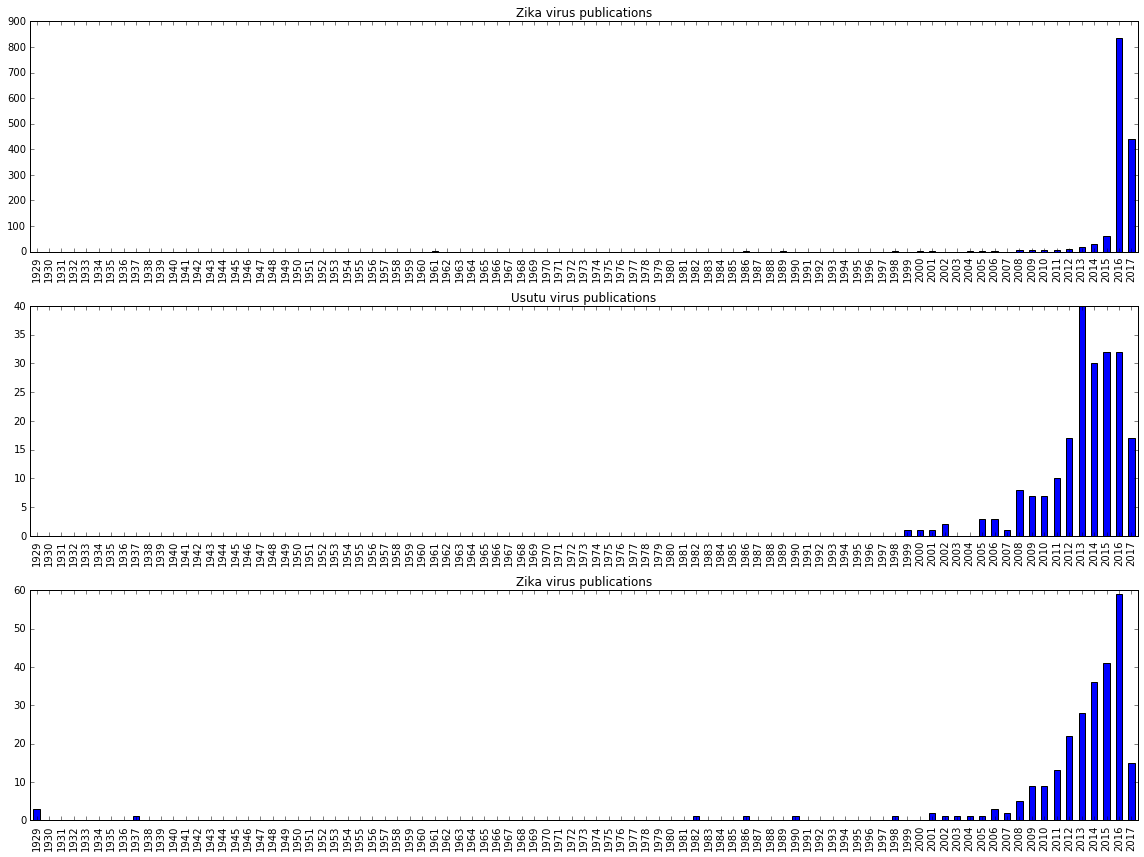

In [24]:
# make base figure
fig = plt.figure(figsize=(16, 12), dpi=300)

# draw subplot 1 = zika
ax1 = fig.add_subplot(3, 1, 1)
years_df['zika'].plot(kind='bar', ax=ax1)
ax1.set_title('Zika virus publications')

# draw subplot 2 = usutu
ax2 = fig.add_subplot(3, 1, 2)
years_df['usutu'].plot(kind='bar', ax=ax2)
ax2.set_title('Usutu virus publications')

# draw subplot 3 = aegypti
ax3 = fig.add_subplot(3, 1, 3)
years_df['aegypti'].plot(kind='bar', ax=ax3)
ax3.set_title('Zika virus publications')

fig.tight_layout() # adjust spacing between subplots
# save plot
plt.savefig('timeline.svg')

The timelines show us, that the research field around Zika is very new and seem to be mostly influence by the outbreak in the last year. Aedes aegypti and the Usutu virus are both increasing rapidly since 2000.

### Explore the authors
Another interesting thing to know is, who are the most active reasearchers in the field. For this, we compute the most common authors for each corpus. First we get the complete list of authors ordered by number of works associated, which we then filter by the top n-authors. The value for how many authors you want to get shown can be adapted easily by changing the value for `num_authors`.

In [25]:
zika_authors = zika.get_authors()

# num_authors = len(authors) # set to this, if you want to see all authors listed up. Be ware, this can lead to a very long list in the browser window.
num_authors = 20 # change the value to your needs

for author in zika_authors.most_common()[:num_authors]:
    print(author)

('Faye O', 25)
('Weaver SC', 21)
('Sall AA', 19)
('Musso D', 13)
('Cao-Lormeau VM', 12)
('de Lamballerie X', 11)
('Schmidt-Chanasit J', 11)
('Leparc-Goffart I', 10)
('Osorio JE', 10)
('Li Y', 10)
('Liu Y', 9)
('Aliota MT', 9)
('Diallo M', 9)
('Tesh RB', 9)
('Wang Z', 9)
('Vasilakis N', 9)
('Rodriguez-Morales AJ', 9)
('Yang H', 8)
('Megarbane B', 8)
('Sardi SI', 8)


We now want to take a look on how many authors can be found in the Zika and in the Usutu virus dataset. Be aware: This is not the general truth, it only can make a statement about the dataset we use, and cause our dataset is not complet with all publications ever done by any researcher, the outcome has limited validity.

In [26]:
print('Number Zika authors', len(zika_authors))

Number Zika authors 9225


**Discussion of outcomes:**

We could now use the found authors and try to find out more information about them, or look for other publications. Or analyse the list of authors further and find matches between the three corpuses. This is at least a good starting point to get some people/researchers/faces connected to Zika research.

### Explore the journals

The final metadata we will have a look on is the journal, in which the publications are published. This is a good hint where we can find more research related publications. We again get the journals ordered by most mentions and print the top n out. 

In [27]:
zika_journals = zika.get_journals()

# num_authors = len(zika_journals) # set to this, if you want to see all authors listed up
num_journals = 20 # change the value to your needs

for journal in zika_journals.most_common()[:num_journals]:
    print(journal)

('PLoS neglected tropical diseases', 163)
('Emerging infectious diseases', 96)
('Scientific reports', 74)
('PloS one', 69)
('Parasites & vectors', 48)
('Bulletin of the World Health Organization', 40)
('PLoS pathogens', 30)
('Frontiers in microbiology', 29)
('BMC infectious diseases', 28)
('Euro surveillance : bulletin Europeen sur les maladies transmissibles = European communicable disease bulletin', 22)
('F1000Research', 22)
('Virology journal', 22)
('PLoS currents', 21)
('Memorias do Instituto Oswaldo Cruz', 20)
('EBioMedicine', 19)
('mBio', 19)
('Viruses', 18)
('The American journal of tropical medicine and hygiene', 17)
('International journal of environmental research and public health', 17)
('Emerging microbes & infections', 15)


**Discussion of outcomes**

The journals have a high rate of matches with some differences, but mostly they differ only in the rank.

## Frequency of species

First we create a network between papers and entities such as genes or genus. In this network a node is either a unique identifier of a paper, or the name of the entity. An edge or link between nodes is created when a paper mentions an entity. The entities have been identified through the [ami-plugins](https://github.com/ContentMine/ami/).

### Check the most mentioned species

Here we list the most mentioned species in the genus corpus. This should give us a good first insight. This can easily be done with the other corpus, just change the variable for the `create_network` function.

In [28]:
B_genus, genus_fact_graph, genus_paper_graph, genus_fact_nodes, genus_paper_nodes = create_network(zika, "species", "genus")

start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_genus)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_genus.neighbors(node)), node)

355 Aedes
135 Flaviviridae
134 Flavivirus
92 Culex
73 Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora.
69 Wolbachia
65 Anopheles
47 Drosophila
40 Plasmodium
39 Ribosomal frameshifting and transcriptional slippage: From genetic steganography and cryptography to adventitious use.
34 An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar.
33 Making Mosquito Taxonomy Useful: A Stable Classification of Tribe Aedini that Balances Utility with Current Knowledge of Evolutionary Relationships.
30 Microbial control of arthropod-borne disease.
30 Comparative analysis of gut microbiota of mosquito communities in central Illinois.
28 Togaviridae
23 Alphavirus
22 DNA Microarray Platform for Detection and Surveillance of Viruses Transmitted by Small Mammals and Arthropods.
21 DNA barcodes from four loci provide poor resolution of taxonomic groups in the genus Crataegus.
19 ESMO / ASCO Rec

**Discussion of outcomes**

The outcome shows us some expected results, like Aedes, Flavivirus, etc. There is also [Wolbachia](https://en.wikipedia.org/wiki/Wolbachia), a bacterium that stops mosquitoes from transmitting viruses.

Next we want to have a look at the papers with the most species named in.

In [29]:
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_genus)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_genus.neighbors(node)), node)

355 Aedes
135 Flaviviridae
134 Flavivirus
92 Culex
73 Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora.
69 Wolbachia
65 Anopheles
47 Drosophila
40 Plasmodium
39 Ribosomal frameshifting and transcriptional slippage: From genetic steganography and cryptography to adventitious use.
34 An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar.
33 Making Mosquito Taxonomy Useful: A Stable Classification of Tribe Aedini that Balances Utility with Current Knowledge of Evolutionary Relationships.
30 Microbial control of arthropod-borne disease.
30 Comparative analysis of gut microbiota of mosquito communities in central Illinois.
28 Togaviridae
23 Alphavirus
22 DNA Microarray Platform for Detection and Surveillance of Viruses Transmitted by Small Mammals and Arthropods.
21 DNA barcodes from four loci provide poor resolution of taxonomic groups in the genus Crataegus.
19 ESMO / ASCO Rec

Then we will take a look on the binomial facts.

In [30]:
B_binomial, binomial_fact_graph, binomial_paper_graph, binomial_fact_nodes, binomial_paper_nodes = create_network(zika, "species", "binomial")

start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_binomial)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_binomial.neighbors(node)), node)

652 Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora.
443 Aedes aegypti
284 Ae. aegypti
256 Aedes albopictus
215 Ae. albopictus
177 An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar.
141 Lectins, Interconnecting Proteins with Biotechnological/Pharmacological and Therapeutic Applications.
82 A. aegypti
78 Composition and Genetic Diversity of Mosquitoes (Diptera: Culicidae) on Islands and Mainland Shores of Kenya's Lakes Victoria and Baringo.
76 Diversity of Cultivable Midgut Microbiota at Different Stages of the Asian Tiger Mosquito, Aedes albopictus from Tezpur, India.
74 Mosquito Oviposition Behavior and Vector Control.
69 Mushroom Polysaccharides: Chemistry and Antiobesity, Antidiabetes, Anticancer, and Antibiotic Properties in Cells, Rodents, and Humans.
65 Anopheles gambiae
65 Culex quinquefasciatus
64 Biodiversity and Temporal Distribution of Immature Culicidae in 

In [31]:
# B_genussp, genussp_fact_graph, genussp_paper_graph, genussp_fact_nodes, genussp_paper_nodes = create_network(aedesaegypti, "species", "genussp")
# B_genussp, genussp_fact_graph, genussp_paper_graph, genussp_fact_nodes, genussp_paper_nodes = create_network(binomial, "species", "genussp")
B_genussp, genussp_fact_graph, genussp_paper_graph, genussp_fact_nodes, genussp_paper_nodes = create_network(zika, "species", "genussp")

start_with = 0 # enter a number here
how_many = 20 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_genussp)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(len(B_genussp.neighbors(node)), node)

79 Aedes spp
29 Culex spp
15 Aedes sp
14 Mayaro virus and dengue virus 1 and 4 natural infection in culicids from Cuiabá, state of Mato Grosso, Brazil.
9 Culex sp
9 Anopheles spp
9 The persistence and ecological impacts of a cyanobacterium genetically engineered to express mosquitocidal Bacillus thuringiensis toxins.
8 Deep sequencing of the 16S ribosomal RNA of the neonatal oral microbiome: a comparison of breast-fed and formula-fed infants.
8 New insights into flavivirus evolution, taxonomy and biogeographic history, extended by analysis of canonical and alternative coding sequences.
8 Molecular detection of flaviviruses and alphaviruses in mosquitoes (Diptera: Culicidae) from coastal ecosystems in the Colombian Caribbean.
8 Composition and Genetic Diversity of Mosquitoes (Diptera: Culicidae) on Islands and Mainland Shores of Kenya's Lakes Victoria and Baringo.
7 Polyphenol-Rich Diets Exacerbate AMPK-Mediated Autophagy, Decreasing Proliferation of Mosquito Midgut Microbiota, and Exte

### Find local communities of species
We identify the three biggest communities of co-occuring genus and plot them separately. A community subgraph is a collection of, in our case, genus that are connected with each other.

Aedes
Phlox
Crataegus


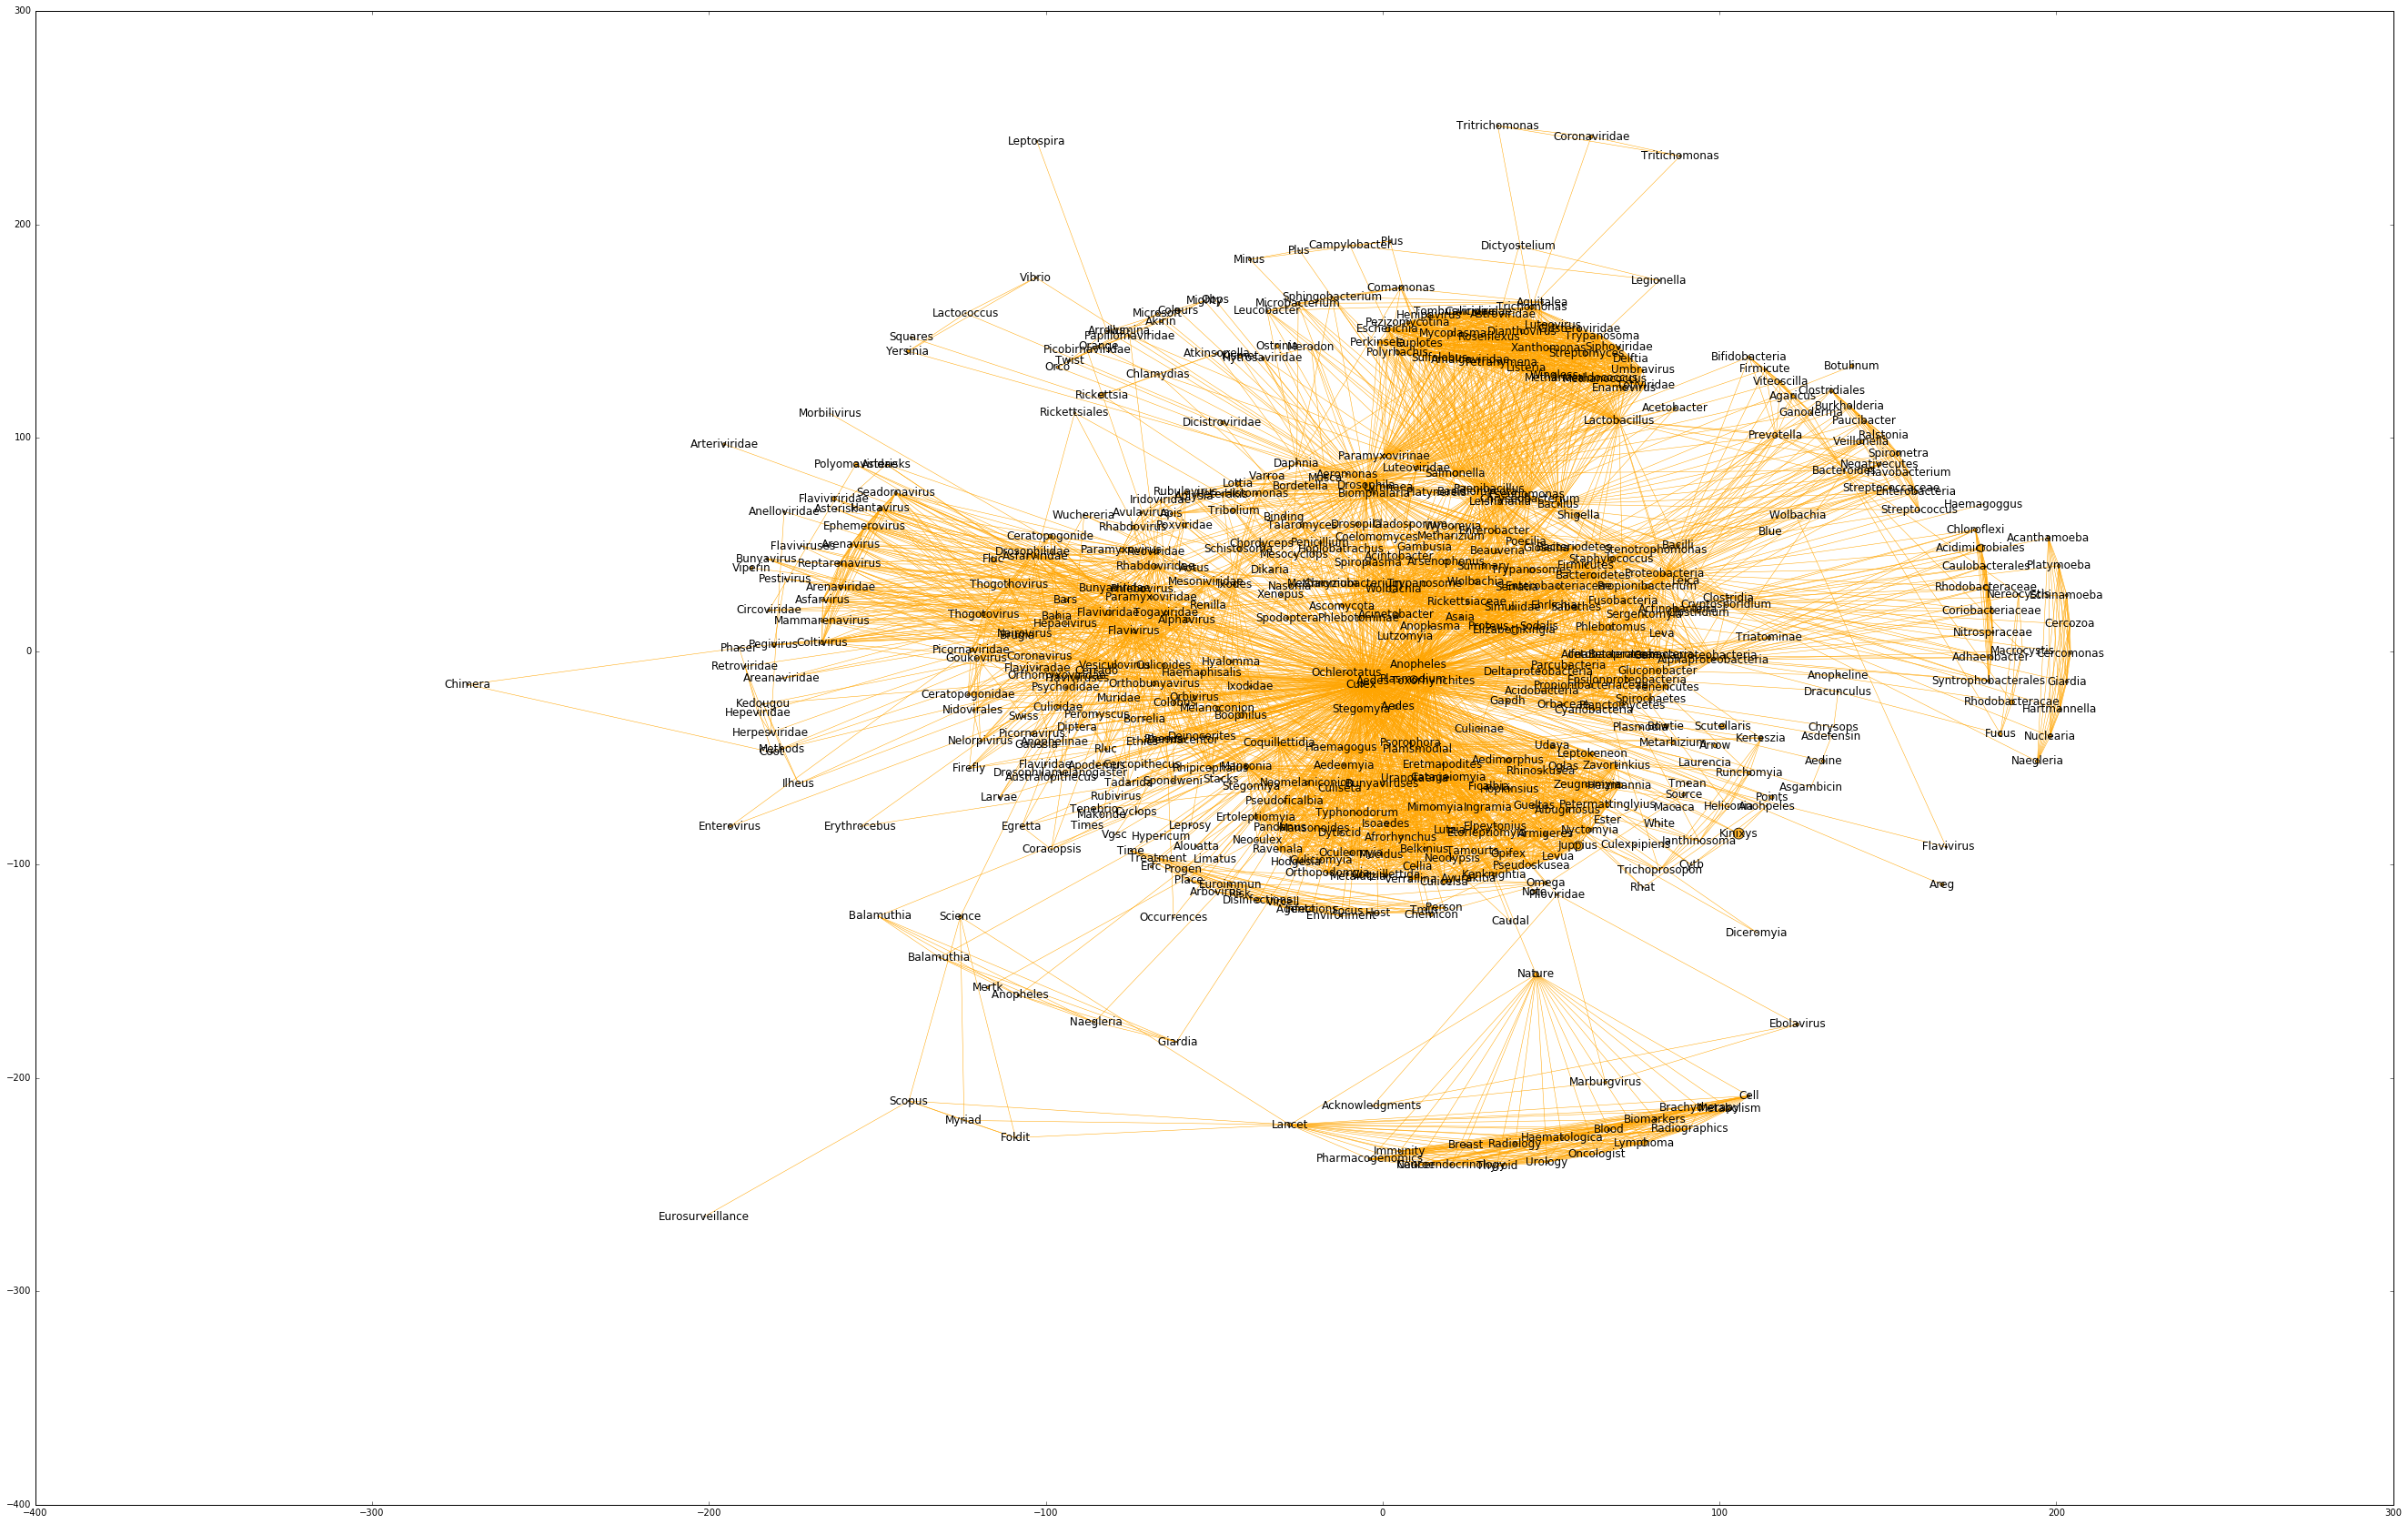

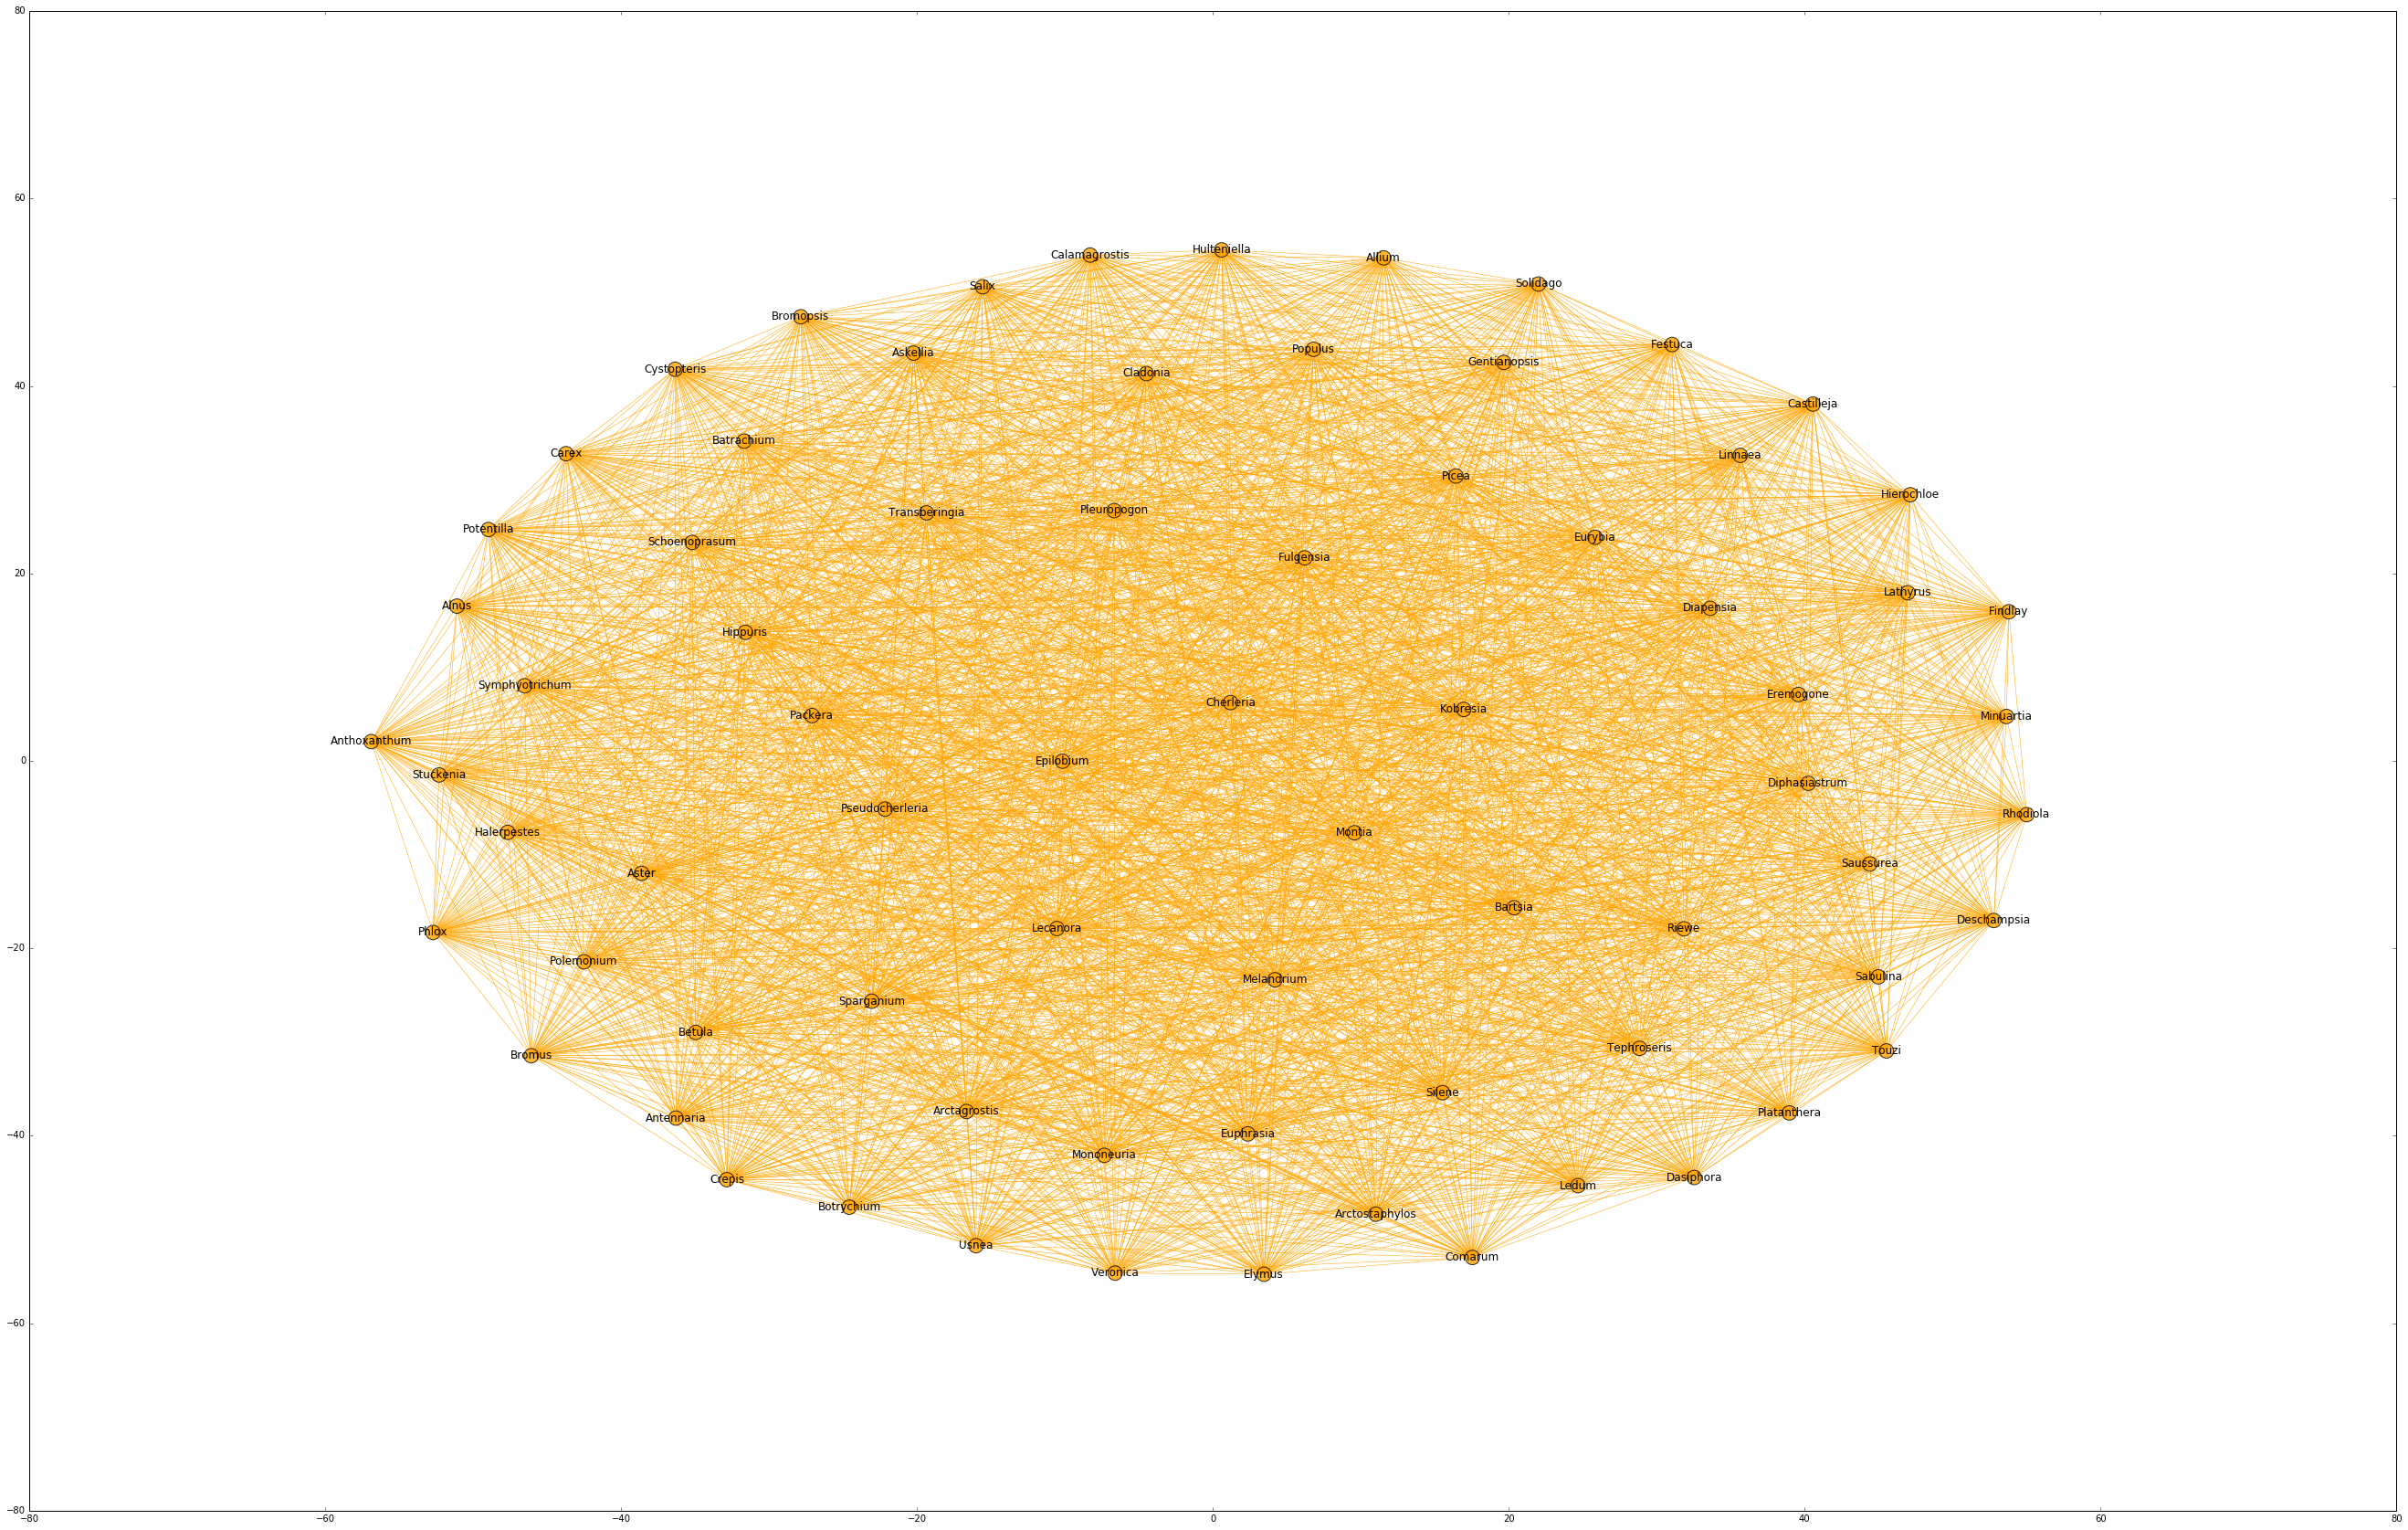

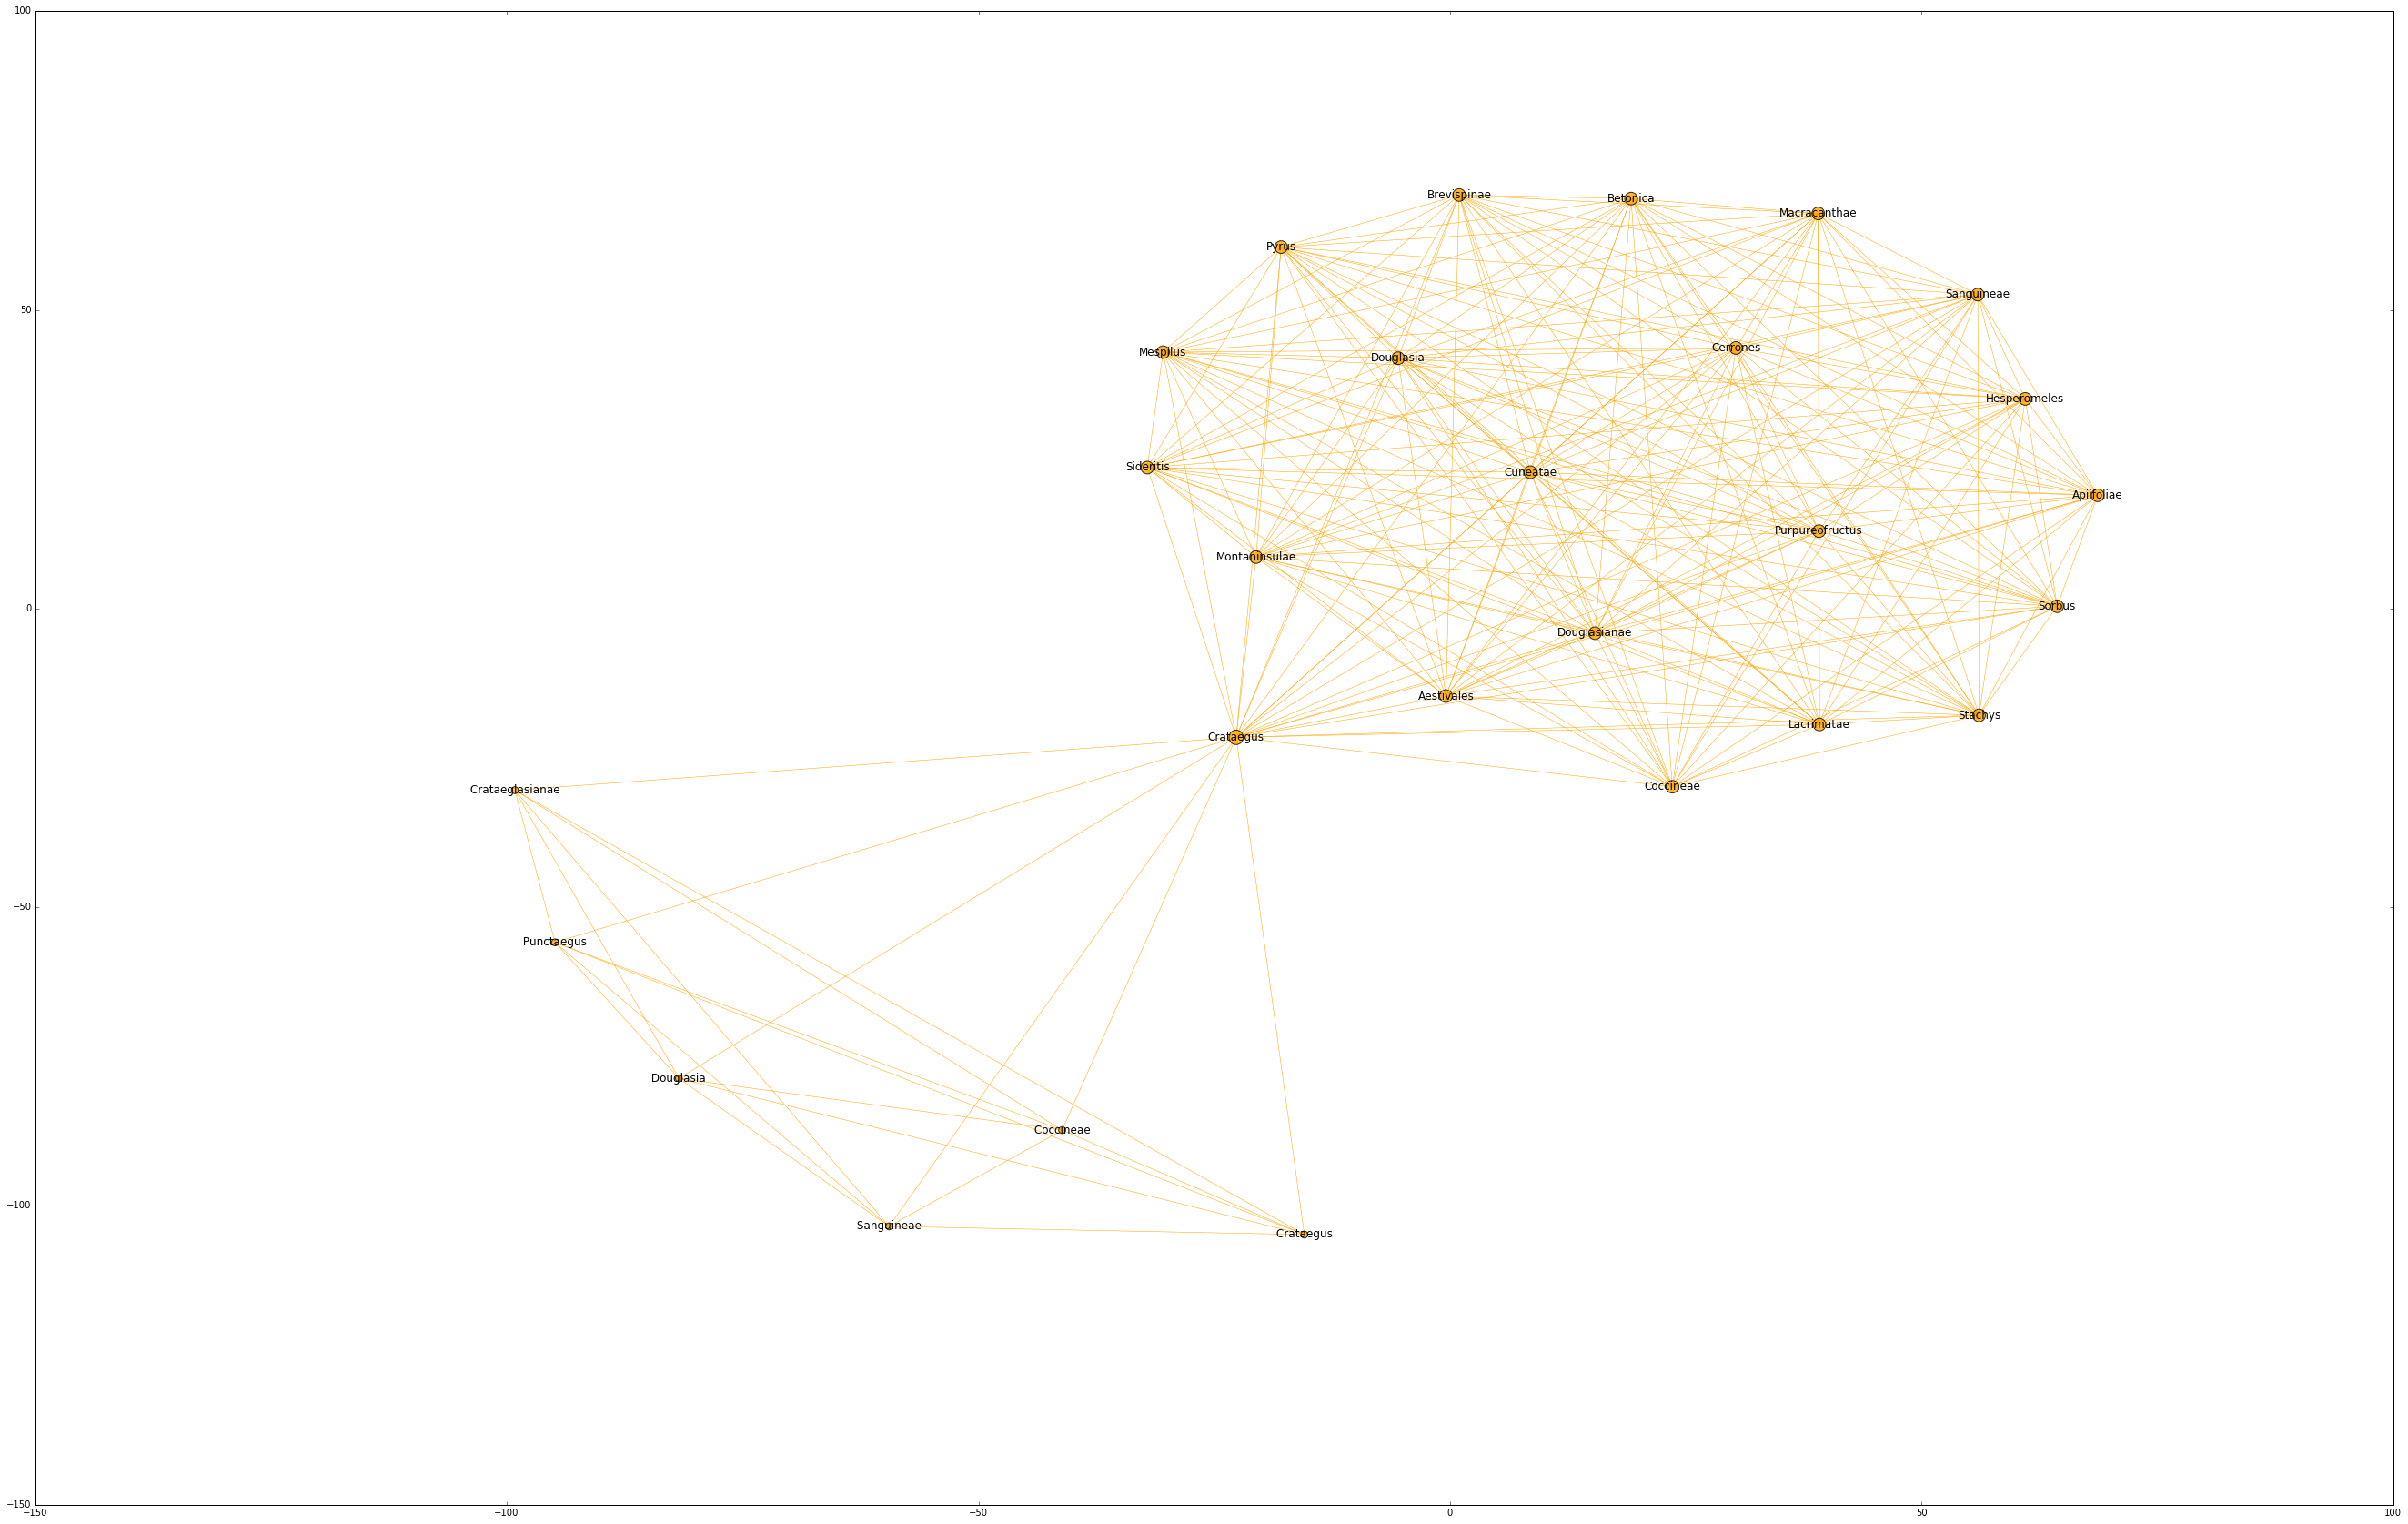

In [32]:
start_with = 0 # pick a number between 1 and 50
how_many = 3 # choose the number of communities you want to plot between 1 and 5. More takes a lot of space in your notebook
subgraphs = sorted(nx.connected_component_subgraphs(genus_fact_graph), key=len, reverse=True)[start_with:start_with+how_many]
for idx, sg in enumerate(subgraphs):
    degreeCent = nx.algorithms.degree_centrality(sg)
    print(max(degreeCent, key=degreeCent.get))
    save_graph(sg, "orange", 'local-community-'+str(idx + 1)) # choose a color, e.g. red, blue, green, ...

## Get information for a specific fact

Now we want to dig deep on a certain fact and explore the relation and appearance.

**Choose one specific entity for your further analysis.**

Change the string to your chosen species. Beware: If you choose one with more than 5 neighbors it should give you some interesting results.

In [33]:
my_species = "Wolbachia"
print(my_species in genus_fact_nodes)
print(my_species in binomial_fact_nodes)
print(my_species in genussp_fact_nodes)

True
False
False


### Co-occurences of species

First we want to have a look on genus facts, which co-occure with our chosen species. This means, the terms listed are mentioned in the same publication as our term.

In [34]:
print("Number of neighbors:", len(genus_fact_graph.neighbors(my_species)))
for idx, neighbor in enumerate(genus_fact_graph.neighbors(my_species)):
    print(idx+1, ':', neighbor)

Number of neighbors: 124
1 : Sergentomyia
2 : Wyeomyia
3 : Togaviridae
4 : Flaviviruses
5 : Propionibacterium
6 : Rhabdoviridae
7 : Summary
8 : Chlamydias
9 : Acidobacteria
10 : Simuliidae
11 : Varroa
12 : Alphaproteobacteria
13 : Trypanosome
14 : Lactobacillus
15 : Metharyzium
16 : Asaia
17 : Arsenophonus
18 : Atkinsonella
19 :  Aedes
20 : Chryseobacterium
21 : Betaproteobacteria
22 : Enterobacter
23 : Biomphalaria
24 : Rickettsia
25 : Leishmania
26 : Sodalis
27 : Anoplasma
28 : Enterobacteriaceae
29 : Anopheles
30 : Pseudomonas
31 :  Wolbachia 
32 : Aedes
33 : Hytrosaviridae
34 : Gammaproteobacteria
35 : Ehrlichia
36 : Chordyceps
37 : Mesocyclops
38 : Gambusia
39 : Hepacivirus
40 : Elizabethkingia
41 : Plasmodium
42 : Ochlerotatus
43 : Heterakis
44 : Deltaproteobacteria
45 : Coelomomyces
46 : Cladosporium
47 : Stegomyia
48 : Spiroplasma
49 : Metharizium
50 : Culex
51 : Paenibacillus
52 : Ostrinia
53 : Talaromyces
54 : Proteus
55 : Dikaria
56 : Asfarviridae
57 : Basidiomycota
58 : Sal

Next we want to take a look at, in which papers the species was mentioned.

In [35]:
print("Number of neighbors:", len(B_genus.neighbors(my_species)))
for idx, neighbor in enumerate(B_genus.neighbors(my_species)):
    print(idx+1, ':', neighbor)

Number of neighbors: 69
1 : First report of the Phe1534Cys kdr mutation in natural populations of Aedes albopictus from Brazil.
2 : Control of Urban Zika Vectors: Should We Return to the Successful PAHO/WHO Strategy?
3 : Predicting Wolbachia invasion dynamics in Aedes aegypti populations using models of density-dependent demographic traits.
4 : New Paradigms for Virus Detection, Surveillance and Control of Zika Virus Vectors in the Settings of Southeast Asia.
5 : Prospects and challenges of CRISPR/Cas genome editing for the study and control of neglected vector-borne nematode diseases.
6 : Molecular detection and identification of Wolbachia in three species of the genus Lutzomyia on the Colombian Caribbean coast.
7 : Microbial control of arthropod-borne disease.
8 : Comparative analysis of gut microbiota of mosquito communities in central Illinois.
9 : Near-Infrared Spectroscopy, a Rapid Method for Predicting the Age of Male and Female Wild-Type and Wolbachia Infected Aedes aegypti.
10